In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from IPython.html import widgets
from IPython.html.widgets import interact

/Users/j35/anaconda/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
from PyQt4 import QtGui

In [6]:
import pyfits

## Select the working folder

In [7]:
%gui qt

In [8]:
try:
    from PySide import QtCore, QtGui
except ImportError:
    from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a directory
    """
    if dir is None: dir ='../'
    dir_name = QtGui.QFileDialog.getExistingDirectory(None, "Select Folder ...",
                                                  dir,
                                                  QtGui.QFileDialog.ShowDirsOnly)
    return dir_name

In [9]:
%gui qt
data_folder = gui_fname()
%matplotlib inline

In [10]:
list_of_files = [name for name in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, name))]
number_of_files = len(list_of_files)

print('Folder contains %d files.' %number_of_files)

Folder contains 6 files.


In [11]:
image_file_0 = os.path.join(data_folder, list_of_files[0])

In [12]:
print("Does this file exist: " ,os.path.isfile(image_file_0))

Does this file exist:  True


## Select Cropp|ing Region

### Images are displayed one at a time

In [13]:
o_fits = pyfits.open(image_file_0)
o_fits_0 = o_fits[0]
data = o_fits_0.data
height, width = data.shape

In [14]:
def plot_image_with_crop_region(file_index, x_left, x_right, y_top, y_bottom):

    image_file = os.path.join(data_folder, list_of_files[file_index])
    o_fits = pyfits.open(image_file)
    o_fits_0 = o_fits[0]
    data = o_fits_0.data
    
    fig = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)

    ax_img.imshow(data, cmap='viridis')
    ax_img.axvline(x_left, color='#00aa00', linewidth=4)
    ax_img.axvline(x_right, color='#00aa00', linewidth=4)
    ax_img.axhline(y_bottom, color='#aa0000', linewidth=4)
    ax_img.axhline(y_top, color='#aa0000', linewidth=4)   
    
    return [x_left, x_right, y_top, y_bottom]

[260, 414, 24, 249]

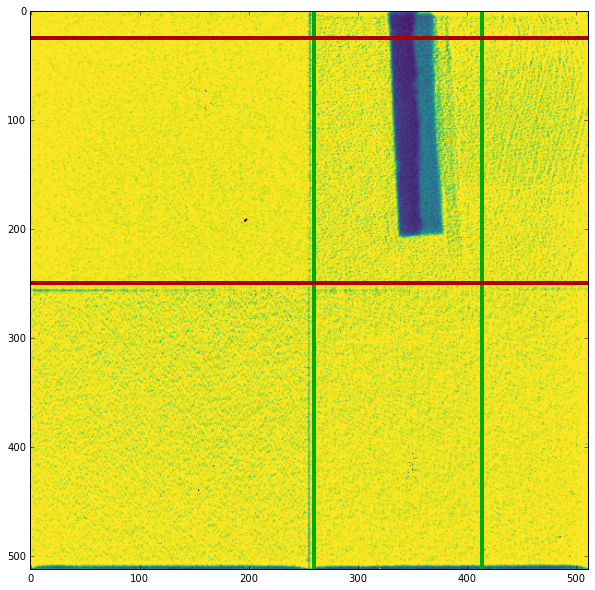

In [15]:
crop = interact(plot_image_with_crop_region, 
        file_index =widgets.IntSlider(min=0, max=number_of_files-1, step=1, value=0, description='Image index'),
        x_left = widgets.IntSlider(min=0, max=width-1, step=1, value=0),
        x_right = widgets.IntSlider(min=0, max=width-1, step=1, value=width-1),
        y_top = widgets.IntSlider(min=0, max=height-1, step=1, value=0), 
        y_bottom = widgets.IntSlider(min=0, max=height-1, step=1, value=height-1))

### Images are all averaged together

In [44]:
image_file_0 = os.path.join(data_folder, list_of_files[0])
o_fits = pyfits.open(image_file_0)
o_fits_0 = o_fits[0]
data = o_fits_0.data

In [84]:
def calculate_sum_image():
    o_fits = pyfits.open(os.path.join(data_folder, list_of_files[0]))
    o_fits_0 = o_fits[0]
    _data = o_fits_0.data
    image_data_array = data
    for i in range(1,number_of_files):
        o_fits = pyfits.open(os.path.join(data_folder, list_of_files[i]))
        o_fits_0 = o_fits[0]
        _data = o_fits_0.data
        image_data_array += _data
        
    return image_data_array

sum_image_data_array = calculate_sum_image()

In [85]:
def plot_image_with_crop_region(x_left, x_right, y_top, y_bottom):

    data = sum_image_data_array
    
    fig = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)

    ax_img.imshow(data, cmap='viridis')
    ax_img.set_title('Average Image')
    ax_img.axvline(x_left, color='#00aa00', linewidth=4)
    ax_img.axvline(x_right, color='#00aa00', linewidth=4)
    ax_img.axhline(y_bottom, color='#aa0000', linewidth=4)
    ax_img.axhline(y_top, color='#aa0000', linewidth=4)   
    
    return [x_left, x_right, y_top, y_bottom]

[0, 511, 0, 511]

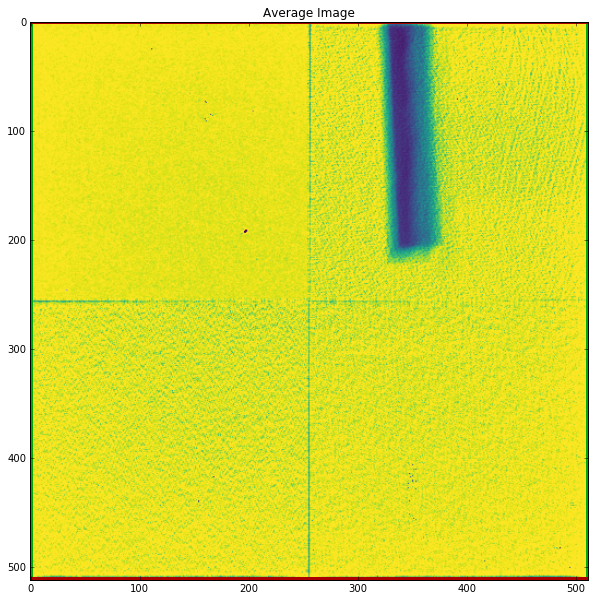

In [79]:
crop = interact(plot_image_with_crop_region, 
        x_left = widgets.IntSlider(min=0, max=width-1, step=1, value=0),
        x_right = widgets.IntSlider(min=0, max=width-1, step=1, value=width-1),
        y_top = widgets.IntSlider(min=0, max=height-1, step=1, value=0), 
        y_bottom = widgets.IntSlider(min=0, max=height-1, step=1, value=height-1))

## Crop Images

In [81]:
[x_left, x_right, y_top, y_bottom] = crop.widget.result
print('Region Selected:')
print('  left : %d' %x_left)
print('  right: %d' %x_right)
print('    top: %d' %y_top)
print(' bottom: %d' %y_bottom)

Region Selected:
  left : 0
  right: 511
    top: 0
 bottom: 511


In [86]:
data = sum_image_data_array
data_cropped = data[y_top: y_bottom, x_left: x_right]
print(data_cropped.shape)

(511, 511)


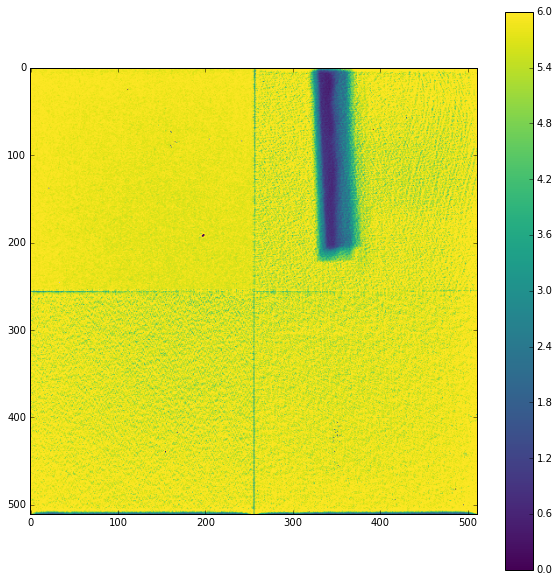

In [87]:
#test
plt.figure(figsize=(10,10))
plt.imshow(data_cropped, cmap='viridis')
plt.colorbar()



## Save Image into Tiff File

In [70]:
from PIL import Image
import numpy as np

In [71]:
output_image_file = '../data/data_cropped.tiff'

In [72]:
new_image = Image.fromarray(np.float32(data_cropped))

In [73]:
new_image.save(output_image_file)